# Generate trial-by-trial model predictions

Natalia Vélez, March 2022

In [1]:
%matplotlib inline
import sys, pprint
import numpy as np
import pandas as pd
import teaching_models as teach
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr, entropy

sys.path.append('..')
from utils import gsearch, int_extract, read_json

sns.set_context('talk')
sns.set_style('white')

Loading teaching problems
{'A': [[0, 0, 1, 1, 0, 0],
       [0, 1, 1, 1, 1, 0],
       [1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1],
       [0, 1, 1, 1, 1, 0],
       [0, 0, 1, 1, 0, 0]],
 'B': [[1, 1, 1, 0, 0, 0],
       [1, 1, 1, 0, 0, 0],
       [1, 1, 1, 1, 0, 0],
       [0, 0, 1, 1, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0]],
 'C': [[0, 0, 0, 1, 1, 1],
       [0, 0, 0, 1, 1, 1],
       [0, 0, 1, 1, 1, 1],
       [0, 0, 1, 1, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0]],
 'D': [[0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 1, 1, 0, 0],
       [1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1]]}
Participants excluded from analysis:
[3, 17]
Cleaning up human behavioral data
    subject  run  block_idx  ex_idx first_movement   start  problem  \
0         1    1          0       0         [0, 1]  [0, 0]       22   
1         1    1          0       1         [0, 1]  [0, 0]       22   
3         1    1          1   

## First-level model

### Generate trial-by-trial parametric regressors

Find MLE files:

In [2]:
param_files = gsearch('outputs/fit_model-info_pref_cost_method-optimize/*.json')
param_files.sort()

print(f'Found {len(param_files)} files')
print(*param_files[:10], sep='\n')
print('...')

Found 28 files
outputs/fit_model-info_pref_cost_method-optimize/sub-01_model-info_pref_cost_method-optimize_result.json
outputs/fit_model-info_pref_cost_method-optimize/sub-02_model-info_pref_cost_method-optimize_result.json
outputs/fit_model-info_pref_cost_method-optimize/sub-04_model-info_pref_cost_method-optimize_result.json
outputs/fit_model-info_pref_cost_method-optimize/sub-05_model-info_pref_cost_method-optimize_result.json
outputs/fit_model-info_pref_cost_method-optimize/sub-06_model-info_pref_cost_method-optimize_result.json
outputs/fit_model-info_pref_cost_method-optimize/sub-07_model-info_pref_cost_method-optimize_result.json
outputs/fit_model-info_pref_cost_method-optimize/sub-08_model-info_pref_cost_method-optimize_result.json
outputs/fit_model-info_pref_cost_method-optimize/sub-09_model-info_pref_cost_method-optimize_result.json
outputs/fit_model-info_pref_cost_method-optimize/sub-10_model-info_pref_cost_method-optimize_result.json
outputs/fit_model-info_pref_cost_method-

Load MLE:

In [3]:
weights = {}

for f in param_files:
    # read model-fitting results
    res = read_json(f)

    # save subject, param values
    sub = int_extract('(?<=sub-)[0-9]{2}', f)
    sub_w = np.array(res['x'])

    weights[sub] = sub_w
    
pprint.pprint(weights)

{1: array([ 0.08682452, 26.92077464,  2.75994875]),
 2: array([1.12689429e-02, 1.17808207e+01, 2.97907311e+00]),
 4: array([ 1.33021777, 22.69895661,  4.02278999]),
 5: array([0.20254451, 8.80212628, 2.54752825]),
 6: array([ 0.05806675, 31.32412117,  2.76783619]),
 7: array([1.16181806e-14, 2.37553024e+01, 1.31432790e+00]),
 8: array([ 0.0797263 , 23.65380052,  2.40645297]),
 9: array([ 0.        , 15.08929169,  2.66616572]),
 10: array([ 1.00391341, 14.71617393,  4.25928774]),
 11: array([ 2.36184777, 23.73162343,  0.95591521]),
 12: array([ 2.27477608, 17.3791758 ,  2.63036876]),
 13: array([ 1.47053635, 27.12446805,  2.37017564]),
 14: array([ 0.0599202 , 11.81754121,  5.45340509]),
 15: array([9.32525408e-14, 2.64190062e+01, 4.46781006e+00]),
 16: array([ 0.02862868, 25.73139327,  3.55613723]),
 18: array([2.31202531e-02, 3.14039094e+01, 4.90516079e+00]),
 19: array([ 0.62950733, 22.29625927,  3.52710997]),
 20: array([ 1.4820817 , 25.47222357,  5.15474266]),
 21: array([0.5633103

Main loop: Use parameter values, behavioral data to generate trial-by-trial predictions

In [4]:
model_list = []

for sub, sub_data in teach.human_df.groupby('subject'):
    print('===== sub-%02d =====' % sub)
    # get subject-specific weights
    sub_w = weights[sub]

    for prob, prob_data in sub_data.groupby('problem'):
        preds = teach.utility_model_predictions(data=prob_data, 
                                                pref_fun=teach.edge_pref, 
                                                weights=sub_w)
        model_list += preds

===== sub-01 =====
===== sub-02 =====
===== sub-04 =====
===== sub-05 =====
===== sub-06 =====
===== sub-07 =====
===== sub-08 =====
===== sub-09 =====
===== sub-10 =====
===== sub-11 =====
===== sub-12 =====
===== sub-13 =====
===== sub-14 =====
===== sub-15 =====
===== sub-16 =====
===== sub-18 =====
===== sub-19 =====
===== sub-20 =====
===== sub-21 =====
===== sub-22 =====
===== sub-23 =====
===== sub-24 =====
===== sub-25 =====
===== sub-26 =====
===== sub-27 =====
===== sub-28 =====
===== sub-29 =====
===== sub-30 =====


New! Compute KL divergence in a way that's consistent with empirically-derived KL (4/19/2022)

In [5]:
def clean_ph(raw):
    '''
    Helper function: Extract belief distribution
    '''
    return np.array([r[1] for r in raw])

# Clean up belief distribution
model_raw = pd.DataFrame(model_list)
model_raw['pH'] = model_raw.pH.apply(clean_ph)

kl_list = []
# Compute KL divergence with an adjustment for small probabilities
for name,group in model_raw.groupby(['subject', 'problem']):
    prior = np.ones(4)/4 # start with a uniform prior
    
    for _, row in group.iterrows():
        pH_adjusted = row.pH + 0.0001 # small adjustment to fix divide-by-0 error
        belief = pH_adjusted/np.sum(pH_adjusted)
        kl = entropy(prior, belief)
        
        prior = belief # carry over belief dist from prior trial
        kl_list.append(kl)
model_raw['KL'] = kl_list

model_raw.head()

,subject,run,block_idx,ex_idx,first_movement,start,problem,order,example,cursor_coords,example_coords,cursor,model,lik,pD,pTrue,pH,entropy,delta,KL
0,1,7,2,0,"[1, 5]","[0, 5]",0,"['C', 'D', 'A', 'B']",33,"[0, 5]","[5, 3]",5,utility,0.025516,"[(0, 0.0), (1, 0.0), (2, 0.06759515331396976),...",0.709270,"[0.7092697265561709, 0.0, 0.0, 0.2907302734438...",0.602804,0.459270,3.613874
1,1,7,2,1,"[1, 5]","[0, 5]",0,"['C', 'D', 'A', 'B']",32,"[5, 3]","[5, 2]",33,utility,0.100961,"[(0, 0.0), (1, 0.0), (2, 0.027850990610207814)...",0.346161,"[0.3461611284212899, 0.0, 0.0, 0.6538388715787...",0.645038,-0.363109,0.272987
2,1,7,2,2,"[1, 5]","[0, 5]",0,"['C', 'D', 'A', 'B']",2,"[5, 2]","[0, 2]",32,utility,0.041067,"[(0, 0.0), (1, 0.0), (2, 0.04106715981416152),...",1.000000,"[1.0, 0.0, 0.0, 0.0]",0.000000,0.653839,5.375828
3,1,1,2,0,"[5, 4]","[5, 5]",1,"['A', 'D', 'C', 'B']",31,"[5, 5]","[5, 1]",35,utility,0.066569,"[(0, 0.0), (1, 0.022073809460125462), (2, 0.00...",0.030642,"[0.030641993268484585, 0.4846790033657577, 0.4...",0.808875,-0.219358,2.149253
4,1,1,2,1,"[5, 4]","[5, 5]",1,"['A', 'D', 'C', 'B']",1,"[5, 1]","[0, 1]",31,utility,0.084346,"[(0, 0.0), (1, 0.08434634305445377), (2, 0.015...",1.000000,"[1.0, 0.0, 0.0, 0.0]",0.000000,0.969358,8.117641


Save model predictions to dataframe:

In [25]:
param_reg = ['pTrue', 'entropy', 'delta', 'KL']
# convert to df
model_df = model_raw.copy()
model_df = model_df[['subject', 'run', 'block_idx', 'ex_idx', 'problem', 'pH'] + param_reg]
model_df['pH'] = model_df.pH.apply(list)

# mean-center parametric regressors
def mean_center(col):
    means = model_df.groupby('subject')[col].transform('mean')
    return model_df[col] - means

for r in param_reg:
    model_df[r] = mean_center(r)

print(model_df.shape)
model_df.head()

(3213, 10)


,subject,run,block_idx,ex_idx,problem,pH,pTrue,entropy,delta,KL
0,1,7,2,0,0,"[0.7092697265561709, 0.0, 0.0, 0.2907302734438...",0.059265,0.007964,0.283881,2.038084
1,1,7,2,1,0,"[0.3461611284212899, 0.0, 0.0, 0.6538388715787...",-0.303844,0.050198,-0.538498,-1.302803
2,1,7,2,2,0,"[1.0, 0.0, 0.0, 0.0]",0.349995,-0.594840,0.478450,3.800038
3,1,1,2,0,1,"[0.030641993268484585, 0.4846790033657577, 0.4...",-0.619363,0.214034,-0.394747,0.573463
4,1,1,2,1,1,"[1.0, 0.0, 0.0, 0.0]",0.349995,-0.594840,0.793969,6.541851


### Check: Correlations between parametric regressors

A priori, we planned to operationalize the learner's *belief* as the learner's posterior belief in the true hypothesis (`pTrue`), and the learner's belief update as the KL divergence in the learner's beliefs between subsequent trials (`KL`). Here, we plan to check the correlations between these parametric regressors, and compare them to two alternative operationalizations:

* `entropy`: The learner's uncertainty, measured over the full belief distribution (note this is inversely related to learner's posterior belief)
* `delta`: The change in the learner's belief in the true hypothesis between subsequent trials

Dataframe of correlations:

In [26]:
corr_df = model_df.groupby('subject')[param_reg].corr().reset_index()
corr_df = corr_df.melt(id_vars=['subject', 'level_1'], value_vars=param_reg, 
                       var_name='level_2', value_name='r')
corr_df.head()

,subject,level_1,level_2,r
0,1,pTrue,pTrue,1.000000
1,1,entropy,pTrue,-0.716651
2,1,delta,pTrue,0.461717
3,1,KL,pTrue,0.135152
4,2,pTrue,pTrue,1.000000


Plot correlations:

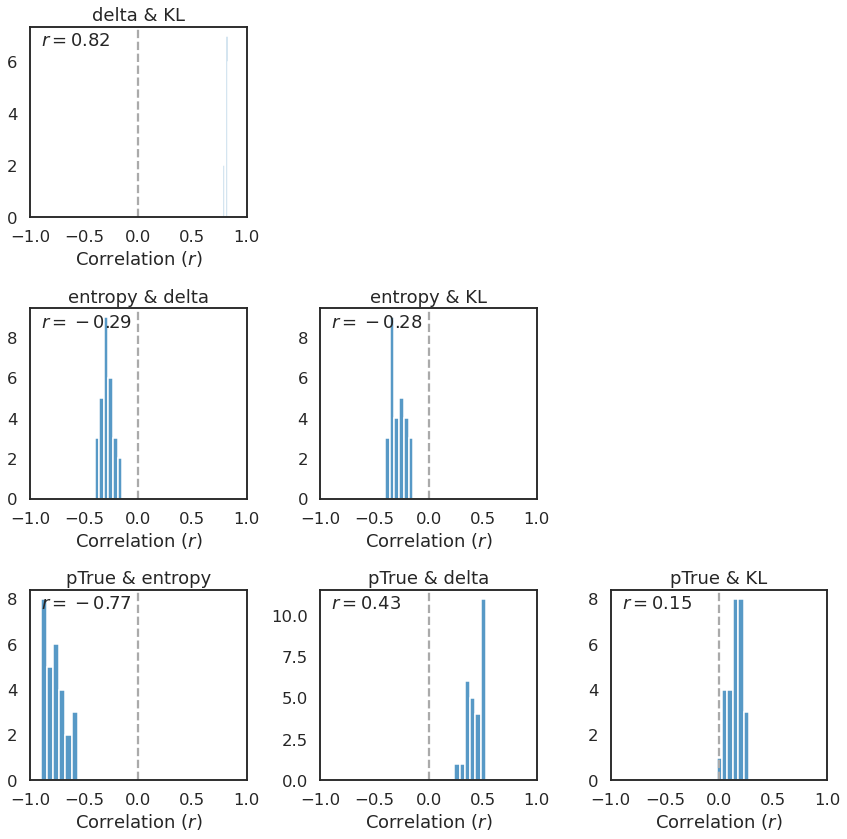

In [27]:
n_ax = len(param_reg)-1
fig,axes=plt.subplots(n_ax, n_ax, figsize=(12,12))
[ax.axis('off') for ax in axes.flatten()] # hide all panels

for i,r_i in enumerate(param_reg):
    for j,r_j in enumerate(param_reg[i+1:]):
        # Plot correlation
        group = corr_df[(corr_df.level_1 == r_i) & (corr_df.level_2 == r_j)]
        sns.histplot(group.r, ax=axes[2-i,j])
        
        # Format axes
        axes[2-i,j].set(ylabel='', xlabel=r'Correlation ($r$)', xlim=(-1,1), title = f'{r_i} & {r_j}')
        axes[2-i,j].axvline(x=0, linestyle='--', color='#aaa')
        axes[2-i,j].axis('on') # turn on used panels
        
        # Add correlation coefficient to plot
        axes[2-i,j].text(-0.9, axes[2-i,j].get_ylim()[-1]*.9, r'$r = %0.2f$' % group.r.mean())
                
fig.tight_layout()

### Save final regressors to file

In [28]:
drop_reg = ['entropy', 'delta']
out_df = (
    model_df
    .copy()
    .drop(columns=drop_reg)
    .sort_values(by=['subject', 'run', 'block_idx', 'ex_idx'])
)

out_f = 'outputs/model_regressor_values.csv'
print(f'Saving to: {out_f}')
out_df.to_csv(out_f, index=False)
out_df.head()

Saving to: outputs/model_regressor_values.csv


,subject,run,block_idx,ex_idx,problem,pH,pTrue,KL
59,1,1,0,0,22,"[0.31966628248169215, 0.2840973828230083, 0.0,...",-0.330339,0.171836
60,1,1,0,1,22,"[0.41300719355797355, 0.0, 0.0, 0.586992806442...",-0.236998,0.445785
49,1,1,1,0,18,"[0.5897481128108489, 0.41025188718915095, 0.0,...",-0.060257,1.998143
50,1,1,1,1,18,"[0.7272727212023776, 0.27272727879762226, 0.0,...",0.077268,-1.531929
51,1,1,1,2,18,"[0.7500000596046231, 0.24999994039537674, 0.0,...",0.099995,-1.574440


## Second-level model

Read model evidence file:

In [19]:
model_levels = ['info_pref_cost', 'info_pref', 'info_cost', 'pref_cost', 'info', 'pref', 'cost', 'strong']

human_pxp = np.loadtxt('outputs/human_model_comparison/human_model_pxp.txt', delimiter=',')
human_labels = np.loadtxt('outputs/human_model_comparison/model_labels.txt', dtype=str)

human_df = pd.DataFrame({'model': human_labels, 'pxp': human_pxp})
human_df['model'] = human_df['model'].astype('category').cat.reorder_categories(model_levels)
human_df = human_df.sort_values(by='model').reset_index(drop=True)

human_df

,model,pxp
0,info_pref_cost,0.459090
1,info_pref,0.000005
2,info_cost,0.000001
3,pref_cost,0.540896
4,info,0.000002
5,pref,0.000002
6,cost,0.000002
7,strong,0.000002


Read probability that each model generated each teacher:

In [20]:
# read posterior
subjects = np.loadtxt('../1_preprocessing/outputs/valid_participants.txt', dtype=int)
human_posterior = pd.read_table('outputs/human_model_comparison/human_model_posterior.txt', sep=',', names=human_labels)
human_posterior['subject'] = subjects
human_posterior['BF'] = human_posterior.info_pref_cost/human_posterior.pref_cost
human_posterior['logBF'] = np.log10(human_posterior.BF)

human_posterior.head()

,cost,info,info_cost,info_pref,info_pref_cost,pref,pref_cost,strong,subject,BF,logBF
0,2.943015e-12,1.019723e-15,6.383238e-13,1.846948e-06,0.112413,1.541821e-05,0.887570,7.596253e-15,1,0.126653,-0.897386
1,6.893218e-04,1.209445e-08,6.932618e-05,1.945952e-07,0.083976,1.716866e-06,0.915263,1.272423e-07,2,0.091751,-1.037389
2,6.900549e-13,3.904184e-17,2.024691e-09,2.767705e-10,0.994982,2.798164e-11,0.005018,5.978903e-19,4,198.300935,2.297325
3,7.434473e-03,1.709568e-06,2.386183e-03,7.138259e-06,0.185708,2.840202e-05,0.804428,6.174224e-06,5,0.230857,-0.636657
4,3.535972e-16,1.545179e-19,6.975146e-17,1.473369e-06,0.098194,1.305119e-05,0.901791,1.246297e-18,6,0.108888,-0.963019


Sanity check: Distribution of 2nd-level predictor

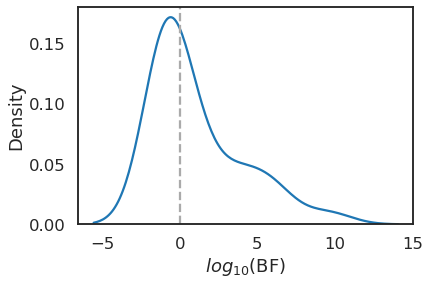

In [21]:
ax = sns.kdeplot(human_posterior["logBF"])
ax.set(xlabel=r'$log_{10}(\mathrm{BF})$')
ax.axvline(x=0, linestyle='--', color='#aaa')

Save to file:

In [22]:
second_lvl_df = human_posterior[['subject', 'logBF']]
second_lvl_df.to_csv('outputs/second_level_model_regressors.csv', index=False)